In [177]:
from google.colab import drive

In [178]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [179]:
"/content/gdrive/MyDrive/AIML/GL_Projects/Recommendations/"

'/content/gdrive/MyDrive/AIML/GL_Projects/Recommendations/'

# New Section

In [180]:
# Importing Libreries
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.Importing datasets

There are six data sets 

phone_user_review_file_1

phone_user_review_file_2

phone_user_review_file_3

phone_user_review_file_4

phone_user_review_file_5

phone_user_review_file_6

**Import first data**

In [181]:
csv_1= "/content/gdrive/MyDrive/AIML/GL_Projects/Data_Set/phone_user_review_file_1.csv"

df1 = pd.read_csv(csv_1,encoding='ISO-8859-1')
print(f"Shape of Dataset 1 : {df1.shape}")
print(f"Size of Data1 : {df1.size}")
df1.head()

Shape of Dataset 1 : (374910, 11)
Size of Data1 : 4124010


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


**Import second data**

In [182]:
csv_2= "/content/gdrive/MyDrive/AIML/GL_Projects/Data_Set/phone_user_review_file_2.csv"

df2 = pd.read_csv(csv_2,encoding='ISO-8859-1')
print(f"Shape of Dataset 1 : {df2.shape}")
print(f"Size of Data1 : {df2.size}")
df2.head()

Shape of Dataset 1 : (114925, 11)
Size of Data1 : 1264175


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


**Import third data**

In [183]:
csv_3= "/content/gdrive/MyDrive/AIML/GL_Projects/Data_Set/phone_user_review_file_3.csv"

df3 = pd.read_csv(csv_3,encoding='ISO-8859-1')
print(f"Shape of Dataset 3 : {df3.shape}")
print(f"Size of Data1 : {df3.size}")
df3.head()

Shape of Dataset 3 : (312961, 11)
Size of Data1 : 3442571


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


**Import fourth data**

In [184]:
csv_4= "/content/gdrive/MyDrive/AIML/GL_Projects/Data_Set/phone_user_review_file_4.csv"

df4 = pd.read_csv(csv_4,encoding='ISO-8859-1')
print(f"Shape of Dataset 4 : {df4.shape}")
print(f"Size of Data1 : {df4.size}")
df4.head()

Shape of Dataset 4 : (98284, 11)
Size of Data1 : 1081124


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [185]:
csv_5= "/content/gdrive/MyDrive/AIML/GL_Projects/Data_Set/phone_user_review_file_5.csv"

df5 = pd.read_csv(csv_5,encoding='ISO-8859-1')
print(f"Shape of Dataset 5 : {df5.shape}")
print(f"Size of Data1 : {df5.size}")
df5.head()

Shape of Dataset 5 : (350216, 11)
Size of Data1 : 3852376


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [186]:
csv_6= "/content/gdrive/MyDrive/AIML/GL_Projects/Data_Set/phone_user_review_file_6.csv"

df6 = pd.read_csv(csv_6,encoding='ISO-8859-1')
print(f"Shape of Dataset 6 : {df6.shape}")
print(f"Size of Data1 : {df6.size}")
df6.head()

Shape of Dataset 6 : (163837, 11)
Size of Data1 : 1802207


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


**In 6 Data set, we can observe that there are 11 attributes and we an combine all to form single data set**

In [187]:
#Combine dataset 1 and 2 
df = df1.append([df2,df3,df4,df5,df6 ])
print(f"Shape of combined Dataset : {df.shape}")
print(f"Size of combined Dataset : {df.size}")
df.head()

Shape of combined Dataset : (1415133, 11)
Size of combined Dataset : 15566463


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Data Cleansing

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


Exept Score and score_max (which are float) are objects in the data set

In [189]:
df.describe()

,score,score_max
count,1.351644e+06,1351644.0
mean,8.007060e+00,10.0
std,2.616121e+00,0.0
min,2.000000e-01,10.0
25%,7.200000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


std deviation of score from mean is 2.6


Lets keep copy of original data

In [190]:
df_copy = df.copy()

In [191]:
df_copy.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


check for any missing values in the data set

In [192]:
# Check Missing Values
df.isnull().sum().any()

True

we can see there are missing values in the data set

In [193]:
df.isnull().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

we can observe many missing values in the data set in score, score_max, author and extract.


# Anyways we need to maintain 1000000 samples we can drop all missing values

In [194]:
df = df.dropna()

In [195]:
df.isnull().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [196]:
# shape of datset after droping null from author, extract and product
df.shape

(1275917, 11)

 1.c) Round off scores to the nearest integers.

In [197]:
df["score"] = df["score"].astype(int)
df["score"].head()

0    10
1    10
2     6
3     9
4     4
Name: score, dtype: int64

**1.e)  Check for duplicate values and remove them if there is any**

In [198]:
df = df.drop_duplicates()

In [199]:
df.shape

(1271444, 11)

**1.f) Keep only 1000000 data samples. Use random state=612.**

In [200]:
# copy data after filling missing values and droping duplicates
df_miss_drop = df.copy()

In [201]:
# keep only 1000000 data samples and using random state =612
df = df.sample(n=1000000, random_state=612)

In [202]:
df.shape

(1000000, 11)

 **1.g) Drop irrelevant features. Keep features like Author, Product, and Score**

In [203]:
df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
209871,/cellphones/sony-ericsson-t715/,10/15/2010,es,es,Ciao,ciao.es,8,10.0,Escogi este movil mas que nada por sus funcion...,k4in,Sony Ericsson T715
61846,/cellphones/lg-g2-594708/,2/5/2014,en,us,LG,lg.com,10,10.0,"This phone is fantastic! Of course, it has so ...",rude28,LG G2 AT&T D800 White
92142,/cellphones/blu-studio-x-plus/,3/19/2015,en,ca,Amazon,amazon.ca,10,10.0,"Bought as a gift for my son, so far he is happ...",alpharomeo,BLU Studio X Plus - Unlocked - Black (Disconti...
39689,/cellphones/apple-iphone-7-plus/,3/5/2017,de,de,Otto.de,otto.de,10,10.0,Habe schon immer ein iPhone und bin auch von d...,Igor F.,"Apple iPhone 7 Plus 5,5"" 128 GB"
57455,/cellphones/apple-iphone-se/,6/26/2016,en,gb,Argos,argos.co.uk,10,10.0,Easy to set up and use.,Han,Sim Free Apple iPhone SE 64GB Mobile Phone - S...


We can observe that phone_url, date, lang, country,source, domain, score max, extract are not required for this anyalysis

In [204]:
# copy final data to df_original before dropping irrelevent features
df_original = df.copy()

In [205]:
df.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [206]:
df.drop(['phone_url','date','lang','country','source','domain','score_max', 'extract'],axis =1, inplace = True)

In [207]:
df.head()

,score,author,product
209871,8,k4in,Sony Ericsson T715
61846,10,rude28,LG G2 AT&T D800 White
92142,10,alpharomeo,BLU Studio X Plus - Unlocked - Black (Disconti...
39689,10,Igor F.,"Apple iPhone 7 Plus 5,5"" 128 GB"
57455,10,Han,Sim Free Apple iPhone SE 64GB Mobile Phone - S...


In [208]:
# Does score values are within 0 to 10.
df.score.unique()

array([ 8, 10,  6,  9,  2,  4,  1,  5,  3,  7,  0])

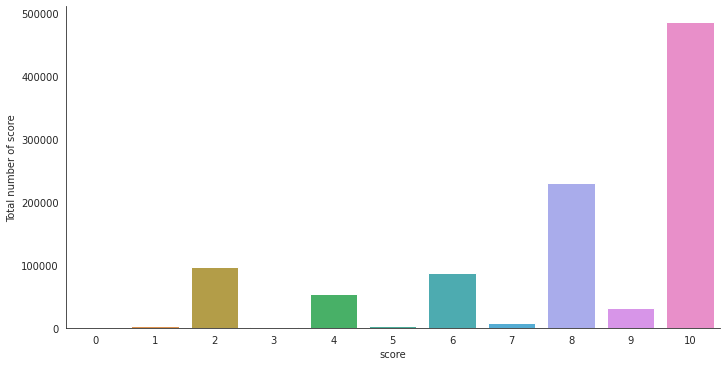

In [209]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("score", data=df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of score")

Out of ten lakhs, approx five lakh products have got 10 rating.

Next is 2.5 lakhs got 8 rating.

**Unique users and products**

In [210]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.author)))
print("Total No of products  :", len(df['product'].unique()))

Total data 
--------------------------------------------------

Total no of ratings : 1000000
Total No of Users   : 626069
Total No of products  : 51989


## **2. Answer the following questions**

**2.a)Identify the most rated features.**

In [211]:
# Most rated is the one the product which got maximum number of ratings.
df.groupby('product')['score'].count().sort_values(ascending=False).head()

product
Lenovo Vibe K4 Note (White,16GB)     4118
Lenovo Vibe K4 Note (Black, 16GB)    3443
OnePlus 3 (Graphite, 64 GB)          3212
OnePlus 3 (Soft Gold, 64 GB)         2798
Huawei P8lite zwart / 16 GB          2121
Name: score, dtype: int64

**Lenovo Vibe K4 Note (White,16GB) got maximum number of scores**

**Lenova vibe k4 note white and Black got maximum number of scores but may or may not got top rated score**

Lets check products which are top rated.


In [212]:
# Products which are top rated are
df.groupby('product')['score'].mean().sort_values(ascending=False).head()

product
ÙØ§ÙØ§ÙÙ P9 Ø¨ÙÙØ³ - 64 Ø¬ÙØ¬Ø§Ø¨Ø§ÙØªØ ÙÙØ± Ø¬Ù Ø§Ù ØªÙ Ø§ÙØ ÙØ§Ù ÙØ§ÙØ Ø°ÙØ¨Ù                                             10.0
Nokia N96 - 16GB - Black Smartphone                                                                                                                10.0
Nokia NOKIA206WHT Nokia 206 white Tesco mobile variant                                                                                             10.0
Nokia NK-N9 Smartphone with 3.9-Inch Touchscreen, 8 MP Camera, 16 GB Internal Memory and A-GPS - Unlocked Phone - International Warranty - Pink    10.0
Nokia NK-N9 Smartphone with 3.9-Inch Touchscreen, 8 MP Camera, 16 GB Internal Memory and A-GPS - Unlocked Phone - International Warranty - Blue    10.0
Name: score, dtype: float64

No idea of what the top rated mobile is that.
But Nokia models are next top four rated mobiles. 

**But what is the mean rating of Lenovo Vibe K4 Note (White,16GB) which got maximum number of rating.**

In [213]:
df[df['product']=='Lenovo Vibe K4 Note (White,16GB)']['score'].mean()

7.149101505585236

In [214]:
df[df['product']=='Lenovo Vibe K4 Note (White,16GB)']['score'].value_counts()

10    1502
8     1081
2      707
6      523
4      305
Name: score, dtype: int64

Lenovo Vibe K4 Note (White,16GB) is maximum rated but its mean rating is 7.15. 

Reason is around 1500 users have rated 2,6 and 4 out of 10. Its means 1500 users are not happy with its features.

In [215]:
# 2 b. Identify the users with most number of reviews. 
(df['author'].value_counts()).head()

Amazon Customer    60370
Cliente Amazon     15021
e-bit               6642
Client d'Amazon     6044
Amazon Kunde        3697
Name: author, dtype: int64

3.c) **Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final 
dataset.**

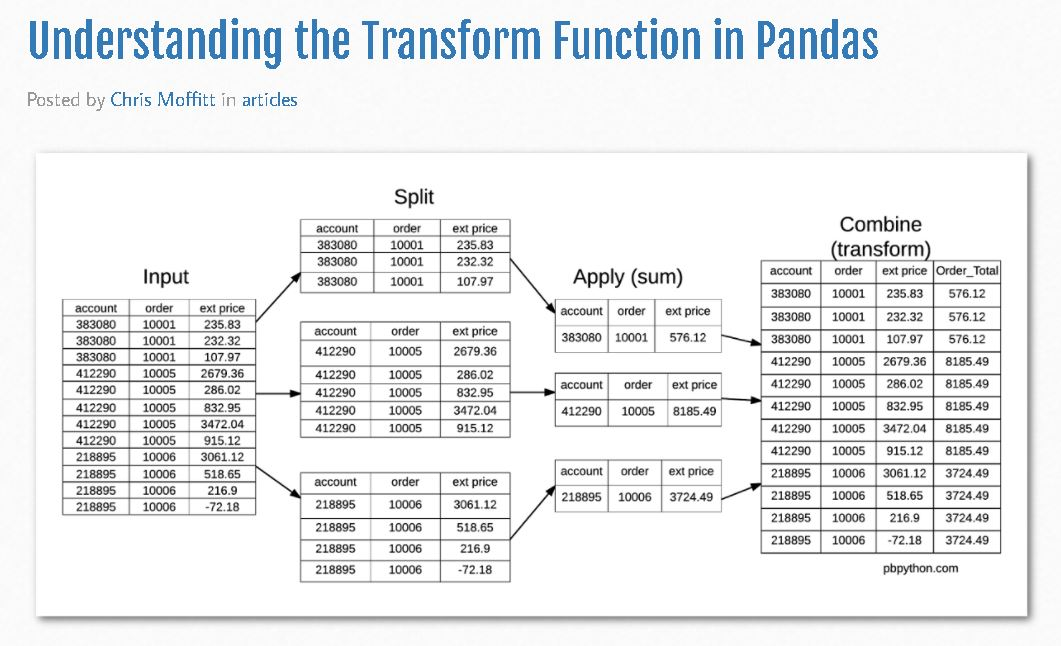

Transform function help to display the count of each item in product attribute

In [216]:
df['p_count'] = df.groupby(['product'])['score'].transform('count')
df.head()


,score,author,product,p_count
209871,8,k4in,Sony Ericsson T715,58
61846,10,rude28,LG G2 AT&T D800 White,72
92142,10,alpharomeo,BLU Studio X Plus - Unlocked - Black (Disconti...,15
39689,10,Igor F.,"Apple iPhone 7 Plus 5,5"" 128 GB",299
57455,10,Han,Sim Free Apple iPhone SE 64GB Mobile Phone - S...,38


Transform function help to display the count of each user in author attribute

In [217]:
df['a_count'] = df.groupby(['author'])['score'].transform('count')
df.head()

,score,author,product,p_count,a_count
209871,8,k4in,Sony Ericsson T715,58,1
61846,10,rude28,LG G2 AT&T D800 White,72,1
92142,10,alpharomeo,BLU Studio X Plus - Unlocked - Black (Disconti...,15,1
39689,10,Igor F.,"Apple iPhone 7 Plus 5,5"" 128 GB",299,1
57455,10,Han,Sim Free Apple iPhone SE 64GB Mobile Phone - S...,38,13


Display dataset with products having more than 50 ratings and users who have given more than 50 ratings

In [218]:
p_u_50rating = df[(df['p_count']>50) & (df['a_count']>50)]
p_u_50rating

,score,author,product,p_count,a_count
71853,2,Amazon Customer,Samsung Guru GT-E1200 (Indigo Blue),595,60370
370293,10,e-bit,Smartphone Samsung Galaxy Gran Prime TV SM-G530,513,6642
20095,10,Kevin,Samsung Galaxy S7 Edge - Smartphone libre Andr...,77,198
263318,10,Eric,"Apple iPhone 6, Silver, 128 GB (Verizon)",77,202
87255,8,Cliente de Amazon,Huawei Ascend Y330 - Smartphone libre Android ...,93,142
...,...,...,...,...,...
192411,8,ÐÐ»ÐµÐºÑÐµÐ¹,Nokia C5,156,467
149289,10,Amazon Customer,"Honor 6X (Grey, 32GB)",182,60370
301402,2,Cliente Amazon,BQ Aquaris E5 HD - Smartphone libre Android (p...,82,15021
143320,10,Giuseppe,"Samsung Galaxy A5 2016 Smartphone LTE, 16GB, Nero",266,287


Final data set of products having more than 50 ratings and users who have given more than 50 ratings

In [219]:
p_u_50rating.shape   # P_count and a_count are extra attributes in the data frame

(111625, 5)

Another way we can find out Final data set of products having more than 50 ratings and users who have given more than 50 ratings

In [220]:
counts1 = df['product'].value_counts()
counts2 = df['author'].value_counts()
# print(counts1)
data_final = df[(df['product'].isin(counts1[counts1 > 50].index)) & (df['author'].isin(counts2[counts2 >50].index)) ]
data_final.shape

(111625, 5)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3. Build a popularity based model and recommend top 5 mobile phones.

In [221]:
#calculating the mean score for a product by grouping it.
ratings_mean_count = pd.DataFrame(df.groupby('product')['score'].mean()) 

In [222]:
# calculating the number of ratings a product got
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('product')['score'].count()) 

In [223]:
# 3. Recommending the 5 mobile phones based in highest mean score and highest number of ratings the product got. 
ratings_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False]).head()

,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,156
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,150
Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi CÃ¢mera 5MP,10.0,131
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.0,129
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,129


#### Popularity based recommendation gives same recommendations to any user who login for the first time or a regular user. 
#### It ignores user preference or choices.
#### It might be good for new users who does not have any specific preference, but for regular users it cannot recommend based on their personal interests.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">4. Build a collaborative filtering model using SVD.

**What is SVD recommender**

The Singular Value Decomposition (SVD), a method from linear algebra that has been generally used as a dimensionality reduction technique in machine learning. SVD is a matrix factorisation technique, which reduces the number of features of a dataset by reducing the space dimension from N-dimension to K-dimension (where K<N). In the context of the recommender system, the SVD is used as a collaborative filtering technique. It uses a matrix structure where each row represents a user, and each column represents an item. The elements of this matrix are the ratings that are given to items by users.

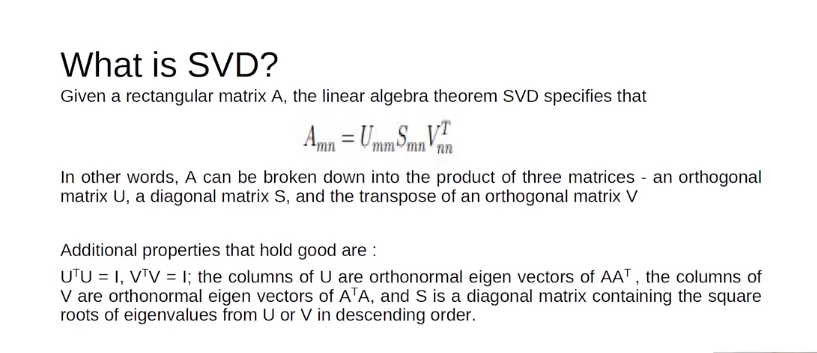

In [224]:
!pip install surprise

In [225]:
from surprise import Dataset,Reader

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['author', 'product', 'score']], reader)

In [226]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=612)

In [227]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x7f32fd9ab150>

In [228]:
# However the ids are the inner ids and not the raw ids
# raw ids can be obatined as follows

print(trainset.to_raw_uid(0))

Dark Lord


In [229]:
from surprise import SVD, KNNWithMeans
from surprise import accuracy

In [230]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

In [231]:
testset[0]

('Vikram Singh', 'Samsung Galaxy E7 (White, 16GB)', 10.0)

In [232]:
test_pred = svd_model.test(testset)

In [273]:
RMSE =[]

In [274]:
# 5. Evaluate the collaborative model. Print RMSE value for SVD
RMSE.append(accuracy.rmse(test_pred))

RMSE: 3.1245


Below are test predictions

In [234]:
test_pred

[Prediction(uid='Vikram Singh', iid='Samsung Galaxy E7 (White, 16GB)', r_ui=10.0, est=9.09088524404174, details={'was_impossible': False}),
 Prediction(uid='Kara L Sundqvist', iid='Samsung GALAXY S III S3 SCH-S960L MARBLE WHITE ANDROID TOUCHSCREEN SMARTPHONE PREPAID NO CONTRACT NET10', r_ui=2.0, est=1, details={'was_impossible': False}),
 Prediction(uid='chris434', iid='7100i', r_ui=10.0, est=7.989053333333334, details={'was_impossible': True, 'reason': 'User and item are unknown.'}),
 Prediction(uid='Chicca', iid='TTfone TT59 Dual 2 Telefono Cellulare con Tasti Grandi, Dual SIM, Nero', r_ui=8.0, est=7.989053333333334, details={'was_impossible': True, 'reason': 'User and item are unknown.'}),
 Prediction(uid='Roberto', iid='Doogee X5 3G Smartphone -- 5.0" IPS Android 5.1 Lollipop MT6580 Quad Core 1.3GHz Dual SIM 1GB RAM 8GB ROM DG Xender Smart Wake Air Gestures GPS Wifi (Bianco)', r_ui=10.0, est=5.5116094256498265, details={'was_impossible': False}),
 Prediction(uid='X. Deng', iid='Nok

In [235]:
from surprise.model_selection import cross_validate
cross_validate(svd_model, data, measures=['RMSE'], cv=3, verbose=False)

{'fit_time': (19.068932056427002, 19.447134971618652, 19.76692223548889),
 'test_rmse': array([3.16229455, 3.17584768, 3.19456107]),
 'test_time': (3.1377370357513428, 3.4764974117279053, 2.873854875564575)}

Test RMSE from cross validation is more than from SVD model, which is 3.12.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">top - K ( K = 5) recommendations ::-
    
**Here I am using SVD algorithm to get the top 5 recommendations of new products for each user.**

In [240]:
k=5
def get_top_n(predictions, n=k):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:k]

    return top_n

In [241]:
from collections import defaultdict
top_n = get_top_n(test_pred , n=5)

In [242]:
top_n

defaultdict(list,
            {'Vikram Singh': [('Samsung Galaxy E7 (White, 16GB)',
               9.09088524404174),
              ('VIVO V5 (Crown gold, 32 GB) (4 GB RAM)', 7.690515069736413),
              ('Samsung Galaxy Core 2 (White, 4GB)', 6.923861527498525),
              ('Apple iPhone 6 (Silver, 64GB)', 6.311509959823415)],
             'Kara L Sundqvist': [('Samsung GALAXY S III S3 SCH-S960L MARBLE WHITE ANDROID TOUCHSCREEN SMARTPHONE PREPAID NO CONTRACT NET10',
               1)],
             'chris434': [('7100i', 7.989053333333334)],
             'Chicca': [('TTfone TT59 Dual 2 Telefono Cellulare con Tasti Grandi, Dual SIM, Nero',
               7.989053333333334),
              ('APPLE iPhone 6 - 16 GB - 4G - Grigio siderale',
               7.989053333333334),
              ('Samsung A500 Galaxy A5 Smartphone, 16 GB, Bianco [Italia]',
               7.989053333333334)],
             'Roberto': [('LG Optimus 4X HD P880 Black Factory Unlocked International Version by Ne

**Comment :** From the above list we can see that model is recommending top 5 products to each user. There are some cases which it recommends less than 5 products. It happend becaus model is not able to find appropriate number of neighbours.

For example : 

  'Kara L Sundqvist': [('Samsung GALAXY S III S3 SCH-S960L MARBLE WHITE ANDROID TOUCHSCREEN SMARTPHONE PREPAID NO CONTRACT NET10',
               1)],

               Only one recommendation for Kara

**Recommend top 5 products for test users.**

In [243]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
bf = pd.DataFrame(test_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
bf['Iu'] = bf.uid.apply(get_Iu)
bf['Ui'] = bf.iid.apply(get_Ui)
bf['err'] = abs(bf.est - bf.rui)
best_predictions = bf.sort_values(by='err')[:5]
worst_predictions = bf.sort_values(by='err')[-5:]

In [244]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
174403,Amazon Customer,"OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)",10.0,10.0,{'was_impossible': False},45238,831,0.0
6423,Amazon Customer,HTC One M8 UK SIM-Free Smartphone - Gunmetal Grey,10.0,10.0,{'was_impossible': False},45238,118,0.0
231460,aaron,Hyperion EA Apple iPhone 4S 16GB - AT&T -,10.0,10.0,{'was_impossible': False},9,33,0.0
128064,Ayush,"OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)",10.0,10.0,{'was_impossible': False},8,831,0.0
214433,Pen Name,"BlackBerry Z10 Unlocked 16 GB World Phone, Black",10.0,10.0,{'was_impossible': False},111,19,0.0


Above are top 5 recommendations for test users using SVD.

For User called manuela, where the rating given by this user and estimated rating is same with error is zero.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Build a collaborative filtering model using kNNWithMeans from surprise using Item based model

**Collaberative filtering (Item-Item recommedation)**
Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

In [245]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader

In [246]:
# arranging columns in the order of user id,item id and rating to be fed in the svd
columns_titles = ['author','product','score']
vs_rev = df.reindex(columns=columns_titles)

In [247]:
# Keep only 5000 data samples. Use random state=612
vs_data = vs_rev.sample(n=5000, random_state=612)

In [248]:
from surprise import Dataset,Reader

reader = Reader(rating_scale=(1, 10))
data_1 = Dataset.load_from_df(vs_data,reader = reader)

In [249]:
trainset_I, testset_I = train_test_split(data_1, test_size=.15)

In [250]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset_I)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [251]:
# run the  model against the testset
test_pred_I = algo.test(testset_I)

In [252]:
test_pred_I

[Prediction(uid='HARSHAD RAVICHAND', iid='Lenovo Vibe K4 Note (Black, 16GB)', r_ui=10.0, est=8.007294117647058, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='shapo2801', iid='Nokia 6303i Ð¡lassic', r_ui=8.0, est=8.007294117647058, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='einer Kundin', iid='ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 5.1 Lollipop, 13,0 Megapixel', r_ui=10.0, est=5.335579486619367, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid='Boots', iid='Samsung Galaxy Note 3 N9005, Unlocked, LTE, 32GB Sim Free International Version, Classic White', r_ui=10.0, est=8.007294117647058, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Claudia GeiÃ\x9fler', iid='Cubot Note S Smartphone ohne Vertrag (5.5 Zoll (13,9 cm) HD Touch-Display mit 4150mAh Akku, 2GB Ram/16GB interner Speicher, Android 6.0, D

In [275]:
# get RMSE
print("Item-based Model : Test Set")
RMSE.append(accuracy.rmse(test_pred_I, verbose=True))

Item-based Model : Test Set
RMSE: 2.5960


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Build a collaborative filtering model using kNNWithMeans from surprise using User based model

 **Model-based collaborative filtering system**
These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [254]:
reader = Reader(rating_scale=(1, 10))
data_U = Dataset.load_from_df(vs_data,reader = reader)

Test and Train split

In [255]:
trainset_U, testset_U = train_test_split(data_U, test_size=.15)

In [256]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset_U)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [257]:
# we can now query for specific predicions
uid = 'Frances DeSimone'  # raw user id
iid = 'Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce.'  # raw item id

In [258]:
# get a prediction for specific users and items.
pred = algo.predict(uid, iid, verbose=True)

user: Frances DeSimone item: Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce. r_ui = None   est = 8.02   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


when, author = Frances DeSimone , item: Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce. estimated rating is 8.0

In [259]:
# run the trained model against the testset
test_pred_U = algo.test(testset_U)

In [260]:
#6. Predict score (average rating) for test users
test_pred_U

[Prediction(uid='Amazon Customer', iid='Motorola Moto G Turbo (Black, 16GB)', r_ui=6.0, est=10, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='arthur augusto', iid='Smartphone Samsung Galaxy S4 Mini GT-I9192', r_ui=10.0, est=8.019764705882354, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='einer Kundin', iid='ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Display, LTE (4G), Android 5.1 Lollipop, 13,0 Megapixel', r_ui=10.0, est=7.0, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='Adolfo Becerra', iid='Apple iPhone 6 16GB Factory Unlocked GSM 4G LTE Internal Smartphone - Space Gray', r_ui=2.0, est=8.019764705882354, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Robertssambo', iid='Samsung Galaxy J5 2016 Black', r_ui=10.0, est=8.019764705882354, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Amazon Customer', ii

**uid='Amazon Customer', iid='Mi 4i (White, 16GB)', r_ui=2.0, est=8.0, details={'actual_k': 2, 'was_impossible': False})**

For an author 'amazon customer', actual rated is  2 for the phone Mi 4i (White, 16GB), but predicted estimated rating is 8. reason is there are only 2 similar customers, which is difficult to predict.

**Prediction(uid='ASMA BIBI', iid='Lenovo Vibe K5 (Grey)', r_ui=8.0, est=7.995058823529412, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),**

For an author 'ASMA BIBI' where actual rated and estimated rated are same but **'was_impossible': True**. there could be no similar users to recommend the product.

In [276]:
# 5. Evaluate the collaborative model. Print RMSE value for User Based CF
print("User-based Model : Test Set")
RMSE.append(accuracy.rmse(test_pred_U, verbose=True))

User-based Model : Test Set
RMSE: 2.6229


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">9. Try cross validation techniques to get better results.

In [277]:
from surprise import NMF
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise import KNNWithZScore
from surprise import BaselineOnly
from surprise import CoClustering
benchmark = []
# Iterate over all algorithms
for algorithm in [NMF(), KNNBaseline(), KNNBasic(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_U, measures=['RMSE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Don

,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,2.539791,0.025919,0.007976
KNNBaseline,2.566206,0.462706,0.012033
KNNBasic,2.582173,0.407334,0.014058
CoClustering,2.595278,0.759273,0.007646
KNNWithZScore,2.598012,0.512053,0.014180
NMF,2.659787,0.823521,0.009149


Observations¶

Looking at the above result, we can say BaselineOnly model works well with the data as it is having the least RMSE score of 2.537

In [282]:
RMSE.append(2.53)
RMSE.append(2.56)
RMSE.append(2.58)
RMSE.append(2.59)
RMSE.append(2.59)
RMSE.append(2.65)

 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">7.Report your findings and inferences.

In [267]:
def precision_recall_at_k(predictions, k=5, threshold=7):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls


kf = KFold(n_splits=5)
svd_model = SVD(n_epochs=20, lr_all=0.005, reg_all=0.2)
precs = []
recalls = []

for trainset, testset in kf.split(data):
    svd_model.fit(trainset)
    predictions = svd_model.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=7)

    # Precision and recall can then be averaged over all users
    print('Precision : ', sum(prec for prec in precisions.values()) / len(precisions))
    print('recalls : ',sum(rec for rec in recalls.values()) / len(recalls))

Precision :  0.8030368576662856
recalls :  0.9562089693800186
Precision :  0.80068449005434
recalls :  0.9572334014185254
Precision :  0.7989928973358751
recalls :  0.9582082808558378
Precision :  0.802946762655384
recalls :  0.9565332451805798
Precision :  0.8011481238973461
recalls :  0.9556847828125178


Comment : I have calculated Precision and recall at k=5. As we know that Precision and recall are binary metrics used to evaluate models with binary output. Thus we need a way to translate our numerical problem (ratings usually from 1 to 10) into a binary problem (relevant and not relevant items). To do the translation I have assumed that any true rating above 7 corresponds to a relevant item and any true rating below 7 is irrelevant.

My precision at 5 in a top-5 recommendation problem is almost 80.3%. This means that 80.3% of the recommendation are relevent to the users.

My recall at 5 in a top-5 recommendation problem is almost 95.82%. This means that 95.82% of the total number of the relevent products appear in the top-k result.

In [287]:
rmse_result = pd.DataFrame(RMSE,index = ['SVD', 'kNNWithMeans_item_based', 'kNNWithMeans_user_based', 'BaselineOnly', 'KNNBaseline','KNNBasic','CoClustering','KNNWithZScore','NMF' ], columns = [ 'rmse'])
rmse_result.sort_values(by=['rmse'],inplace=True,ascending=True)
rmse_result

,rmse
BaselineOnly,2.530000
KNNBaseline,2.560000
KNNBasic,2.580000
CoClustering,2.590000
KNNWithZScore,2.590000
kNNWithMeans_item_based,2.595970
kNNWithMeans_user_based,2.622923
NMF,2.650000
SVD,3.124507


rmse error is less for algorithm BaselineOnly

**Conclusion :**

1) Lenovo Vibe K4 Note (White,16GB) is maximum rated but its mean rating is 7.15. 

Reason is around 1500 users have rated 2,6 and 4 out of 10. Its means 1500 users are not happy with its features.

2) Amazon Customer (60370) is the user with most number of reviews.

3) Samsung Galaxy Note5 is most popular product with 156 ratings.

4) Achieved least error 2.53 with BaseLineonly, whereas max error found with SVD algorithm

5) I Have done EDA to understand the data in precise way and found that half of the authors have given 10 rating.

6) Shape of dataset with products having more than 50 ratings and users who have given more than 50 ratings is 111625

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">10.In what business scenario you should use popularity based Recommendation Systems ?

As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

**Merits of popularity based recommendation system**
 
It does not suffer from cold start problems which means on day 1 of the business also it can recommend products on various different filters.

There is no need for the user's historical data.

 

**Demerits of popularity based recommendation system**
 

Not personalized 

The system would recommend the same sort of products/movies which are solely based upon popularity to every other user.

Example
 

Google News: News filtered by trending and most popular news.

YouTube: Trending videos.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">11. In what business scenario you should use CF based Recommendation Systems ?

Collaborative Filtering is used to building intelligent recommender systems that can learn to give better recommendations as more information about users is collected. It isa personalised recommender system , recommendations are made based on the past behaviour of the user. Most websites like Amazon, YouTube, and Netflix use collaborative filtering as a part of their sophisticated recommendation system.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">12.What other possible methods can you think of which can further improve the recommendation for different users 

Ans. Apart from Popularity and Collaborative Filtering , Content-based, Demographic, Utility based, Knowledge based and Hybrid recommendation system can be used as per the user needs.

**Content based Recommender System:**
It’s mainly classified as an outgrowth and continuation of information filtering research. In this system, the objects are mainly defined by their associated features. A content-based recommender learns a profile of the new user’s interests based on the features present, in objects the user has rated. It’s basically a keyword specific recommender system here keywords are used to describe the items. Thus, in a content-based recommender system the algorithms used are such that it recommends users similar items that the user has liked in the past or is examining currently.

**Demographic based Recommender System:**
This system aims to categorize the users based on attributes and make recommendations based on demographic classes. Many industries have taken this kind of approach as it’s not that complex and easy to implement. In Demographic-based recommender system the algorithms first need a proper market research in the specified region accompanied with a short survey to gather data for categorization. Demographic techniques form “people-to-people” correlations like collaborative ones, but use different data. The benefit of a demographic approach is that it does not require a history of user ratings like that in collaborative and content based recommender systems.

**Utility based Recommender System:**
Utility based recommender system makes suggestions based on computation of the utility of each object for the user. Of course, the central problem for this type of system is how to create a utility for individual users. In utility based system, every industry will have a different technique for arriving at a user specific utility function and applying it to the objects under consideration. The main advantage of using a utility based recommender system is that it can factor non-product attributes, such as vendor reliability and product availability, into the utility computation. This makes it possible to check real time inventory of the object and display it to the user.

**Knowledge based Recommender System:**
This type of recommender system attempts to suggest objects based on inferences about a user’s needs and preferences. Knowledge based recommendation works on functional knowledge: they have knowledge about how a particular item meets a particular user need, and can therefore reason about the relationship between a need and a possible recommendation.

**Hybrid Recommender System:**
Combining any of the two systems in a manner that suits a particular industry is known as Hybrid Recommender system. This is the most sought after Recommender system that many companies look after, as it combines the strengths of more than two Recommender system and also eliminates any weakness which exist when only one recommender system is used. There are several ways in which the systems can be combined, such as: